In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline



In [7]:

iFolder = 0
_files = os.listdir(os.getcwd())
folders = []
for f in _files:
    if 'csv_records_' in f:
        folders.append(f)
        print(f)
folder_name = folders[iFolder]
file_name_spikes = 'all_spikes.csv'
file_name_eye_angle = 'eye_angle.csv'
file_name_neck_angle = 'neck_angle.csv'
file_name_target_position = 'target_position.csv'
path_name = os.getcwd() + '/' + folder_name + '/' 
print(path_name)

csv_records_2020-06-30_10-15-21
csv_records_2020-06-30_09-34-59
csv_records_2020-06-25_14-56-50
csv_records_2020-06-25_15-48-05
csv_records_2020-06-24_09-50-16
/home/mizzou/.opt/nrpStorage/Cerebellum_VOR/csv_records_2020-06-30_10-15-21/


In [8]:
print(path_name)
print(os.listdir(os.getcwd()+'/'+folder_name))

/home/mizzou/.opt/nrpStorage/Cerebellum_VOR/csv_records_2020-06-30_10-15-21/
['eye_angle.csv', 'target_position.csv', 'neck_angle.csv', 'all_spikes.csv']


In [9]:
spikes = np.loadtxt(path_name+file_name_spikes, delimiter=",", skiprows=1)
eye = np.loadtxt(path_name+file_name_eye_angle, delimiter=",", skiprows=1)
neck = np.loadtxt(path_name+file_name_neck_angle, delimiter=",", skiprows=1)
target = np.loadtxt(path_name+file_name_target_position, delimiter=",", skiprows=1)

In [10]:
print('spikes', spikes.shape)
print('eye', eye.shape)
print('neck', neck.shape)
print('target', target.shape)

spikes (245283, 2)
eye (1507, 2)
neck (1507, 2)
target (1507, 3)


In [113]:
res = 20 #resolution
t1 = np.arange(spikes[:,1].max()) * 1e-3
t2 = np.arange(0, eye[:,0].max()+res * 1e-3, res * 1e-3)
print(t1, t2.shape, eye.shape)


[0.0000e+00 1.0000e-03 2.0000e-03 ... 3.0136e+01 3.0137e+01 3.0138e+01] (1507,) (1507, 2)


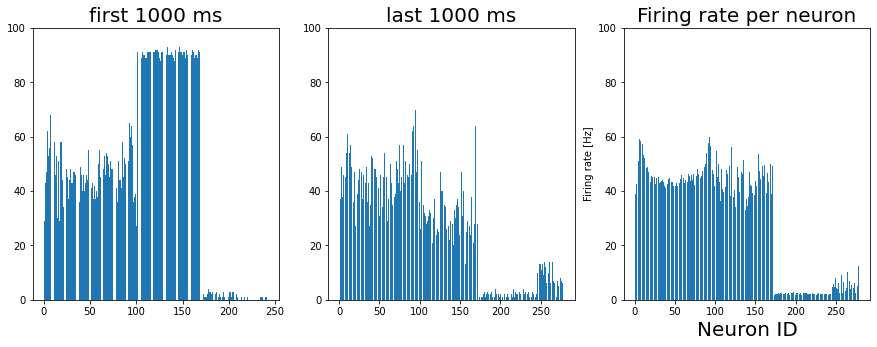

In [47]:
l = 1000
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
idx1 = spikes[:,1] < l
[n_spikes,cells]=np.histogram(spikes[idx1, 0],np.arange(np.min(spikes[idx1, 0]), np.max(spikes[idx1, 0])))
plt.bar(cells[:-1], n_spikes / l*1e3)
plt.ylim(0, 100)
plt.title('first {l} ms'.format(l=l), fontsize=20)

plt.subplot(1,3,2)
idx2 = spikes[:,1] > spikes[:,1].max() - l
[n_spikes,cells]=np.histogram(spikes[idx2, 0],np.arange(np.min(spikes[idx2, 0]), np.max(spikes[idx2, 0])))
plt.bar(cells[:-1], n_spikes / l*1e3)
plt.ylim(0, 100)
plt.title('last {l} ms'.format(l=l), fontsize=20)

plt.subplot(1,3,3)
[n_spikes,cells]=np.histogram(spikes[:, 0],np.arange(np.min(spikes[:, 0]), np.max(spikes[:, 0])))
plt.bar(cells[:-1], n_spikes / (np.max(spikes[:, 1] * 0.001)))
plt.title("Firing rate per neuron", fontsize=20)
plt.xlabel("Neuron ID", fontsize=20)
plt.ylabel("Firing rate [Hz]", fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

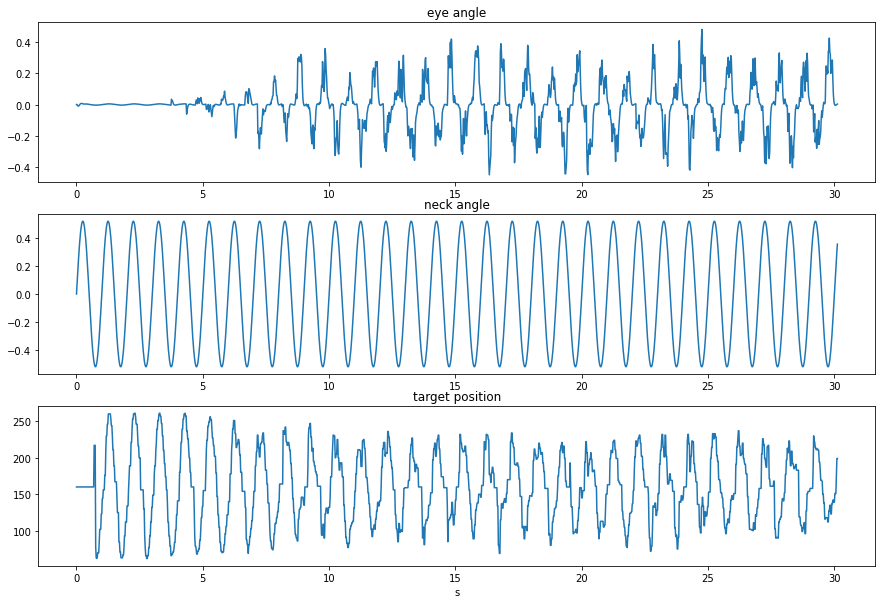

In [114]:
plt.figure(figsize=(15,10))
row = 3
col = 1
plt.subplot(row, col, 1)
plt.plot(t2, eye[:,1])
plt.title('eye angle')
plt.subplot(row, col, 2)
plt.plot(t2, neck[:, 1])
plt.title('neck angle')
plt.subplot(row, col, 3)
plt.plot(t2, target[:,1])
plt.xlabel('s')
plt.title('target position')
plt.show()

In [104]:
def alignSpikes(spikes, alignment, l1, l2):
    spikes_aligned = np.zeros((len(alignment), l1+l2+1)) * np.nan
    for i in alignment:
        spikes_aligned[i, :] = spikes[alignment-l1:alignment+l2]
    

In [124]:
cycles = 5
period = 1000 #ms
alignment = np.zeros(eye.shape[0]//(period//res))
for i in range(len(alignment)):
    alignment[i] = i * period//res


In [19]:
iMF = np.arange(1,100)
iPC = np.arange(100, 172)
iIOp = np.arange(172, 208)
iIOn = np.arange(208, 204)
iDCNp = np.arange(244, 262)
iDCNn = np.arange(262, 280)

In [118]:
np.zeros(eye.shape[0]//(period//res))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [117]:
(period//res)

50